In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_plot(filePath, labelx, line_style, marker_style):
    df = pd.read_csv(filePath)
    

    df['se_encrypt_ema'] = df['_se_encrypt'].ewm(span=3, adjust=False).mean()
    polynomial = np.poly1d(np.polyfit(df['Buffer'], df['se_encrypt_ema'], 3))
    df['se_encrypt_fitted'] = polynomial(df['Buffer'])

    min_se_encrypt_row = df.loc[df['se_encrypt_fitted'].idxmin()]

    min_buffer_size = min_se_encrypt_row['Buffer']
    min_se_encrypt_value = min_se_encrypt_row['se_encrypt_fitted']

    print(filePath)
    print(f"Buffer size {min_buffer_size} and the corresponding _se_encrypt value is {min_se_encrypt_value}.")


    plt.plot(df['Buffer'], df['se_encrypt_fitted'], marker=marker_style, linestyle=line_style, color='black', markerfacecolor = 'None', label=labelx)
    plt.yscale('log')
    plt.legend()




csv/log_4MB_image.png.csv
Buffer size 2688.0 and the corresponding _se_encrypt value is 0.3531438035664767.
csv/log_8MB_image.png.csv
Buffer size 2816.0 and the corresponding _se_encrypt value is 0.6289004816204498.
csv/log_16MB_image.png.csv
Buffer size 3200.0 and the corresponding _se_encrypt value is 1.0229646740293186.
csv/log_32MB_image.png.csv
Buffer size 3200.0 and the corresponding _se_encrypt value is 1.9095479058575258.
csv/log_64MB_image.png.csv
Buffer size 3456.0 and the corresponding _se_encrypt value is 3.333357418038144.


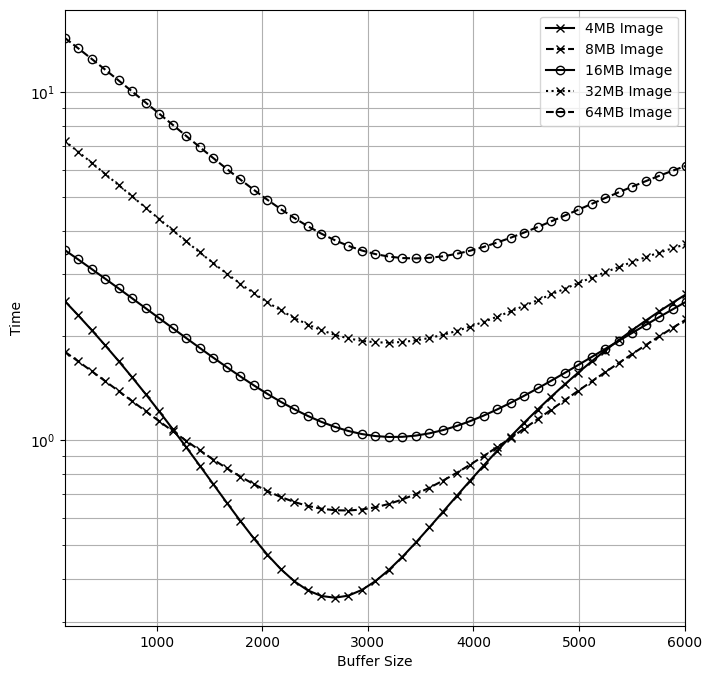

In [54]:
create_plot('csv/log_4MB_image.png.csv', '4MB Image', '-', 'x')
create_plot('csv/log_8MB_image.png.csv', '8MB Image', '--', 'x')
create_plot('csv/log_16MB_image.png.csv', '16MB Image', '-', 'o')
create_plot('csv/log_32MB_image.png.csv', '32MB Image', ':', 'x')
create_plot('csv/log_64MB_image.png.csv', '64MB Image', '--', 'o')








plt.xlabel('Buffer Size')
plt.ylabel('Time')
plt.xlim([128, 6000])
f = plt.gcf()
f.set_figwidth(8)  
f.set_figheight(8)

plt.grid(True, which='both')

plt.savefig('plots/buffer_size_comparison.svg', format='svg')
plt.show()